<a href="https://colab.research.google.com/github/mohdrab01/Machine-Learning-Lab-Tasks/blob/main/ML_Week4(i).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Week 4 - 19-04-2021
# 18071A0591

---






#**IRIS DATASET - DECISION TREE CLASSIFIER**

---



## 1. Get the IRIS dataset

In [ ]:
!wget https://raw.githubusercontent.com/towardsai/tutorials/master/decision_tree_learning/Iris.csv

--2021-04-19 08:53:20--  https://raw.githubusercontent.com/towardsai/tutorials/master/decision_tree_learning/Iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5103 (5.0K) [text/plain]
Saving to: ‘Iris.csv’

Iris.csv            100%[===================>]   4.98K  --.-KB/s    in 0s      

2021-04-19 08:53:20 (38.7 MB/s) - ‘Iris.csv’ saved [5103/5103]



## Import statements

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import tree

%matplotlib inline

## 2. Show IRIS data

In [ ]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 3. Exploring Dataset / EDA

In [ ]:
data.shape # print dataset shape

(150, 6)

In [ ]:
data.dtypes # Datatypes of the dataset

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
print(data.describe())  # Describe given dataset

               Id  sepal_length  sepal_width  petal_length  petal_width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.054000      3.758667     1.198667
std     43.445368      0.828066     0.433594      1.764420     0.763161
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


In [ ]:
# Check for any missing / NULL  values in the columns
data.isna().sum() 

Id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.head() # here ID column isn't required...LET's remove it!!!

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
columns = ['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data.columns = columns
columns

['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
data = data.drop(['id'], axis=1)
data.head() # Thus Dropped column 'ID' !!!

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()  # Print information about dataset columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Check the LABELS and their COUNTS for Target Column 'SPECIES'
data['species'].value_counts() 

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [ ]:
# We Know our Target column is "SPECIES"
target_col = ['species']

In [ ]:
# Seperate the SPECIES label column from dataset
x = data.drop(['species'],axis=1)
y = data['species']

In [ ]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

## 4. SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Let's split the dataset with TEST DATA SIZE = 40% and TRAIN DATA SIZE = 60%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [ ]:
# Exploring the Spliited datasets
x_train.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [ ]:
x_test.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [ ]:
y_train.dtypes

dtype('O')

In [ ]:
y_test.dtypes

dtype('O')

# 5. DECISION TREE CLASSIFICATION ALGO
## (based on GINI index and MAX_DEPTH = 3 ) 


---



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Applying Decision tree classification on x_train and y_train
# GINI Classifier = clf_gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicted y-values when GINI index is used
y_pred_gini = clf_gini.predict(x_test)
y_pred_gini

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',

## 6. Classifier Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('With GINI index as Criterion\nDecision Tree Classifier Model Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

With GINI index as Criterion
Decision Tree Classifier Model Accuracy: 0.9833


## 7. Check for FIT of classifier

In [ ]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9667
Test set score: 0.9833


In [ ]:
# Clearly as Training Set Score is less than Test set Score....
# Model is OVER-FITTED

## 8. Tree - Representation of Decision Tree Model 

[Text(251.10000000000002, 380.52, 'X[3] <= 0.8\ngini = 0.665\nsamples = 90\nvalue = [27, 31, 32]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(334.8, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 63\nvalue = [0, 31, 32]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 5.35\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(83.7, 54.360000000000014, 'gini = 0.117\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(502.20000000000005, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(418.5, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(585.9, 54.360000000000014, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

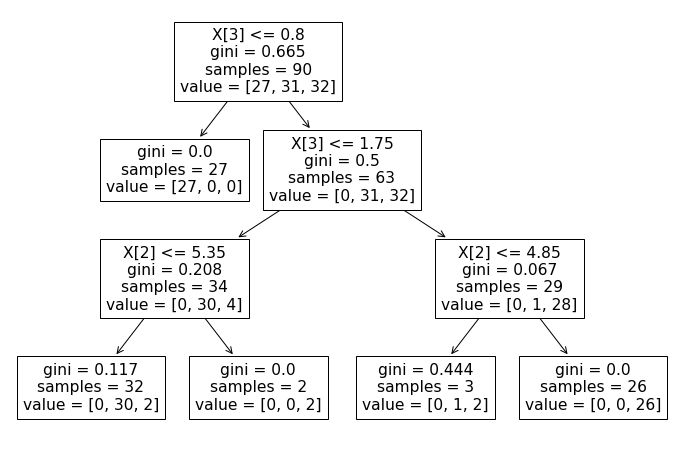

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

## 9(i). Using render tree method to get Tree Visualization in a PDF File

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini.fit(x_train, y_train), out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

## 9(ii). Using export_graphviz to Visualize Trees

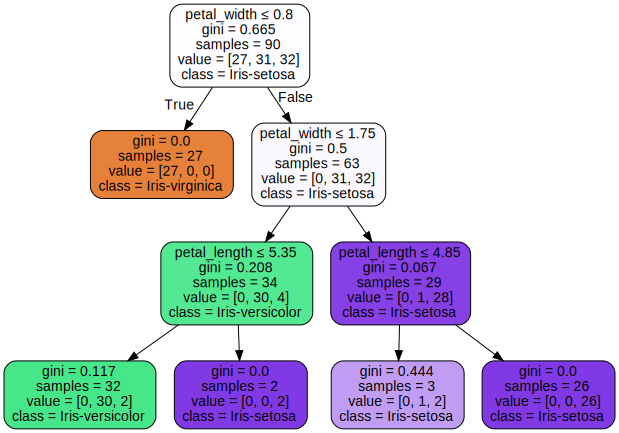

In [ ]:
dot_data = tree.export_graphviz(clf_gini.fit(x_train, y_train), 
                                out_file=None, 
                                feature_names=list(x.columns),  
                                class_names=[ 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa' ],  
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                                leaves_parallel=False
                                )  
graph = graphviz.Source(dot_data)  
graph 

## 10. Using pydotplus to Visualize Trees

In [ ]:
import pydotplus
from IPython.display import Image

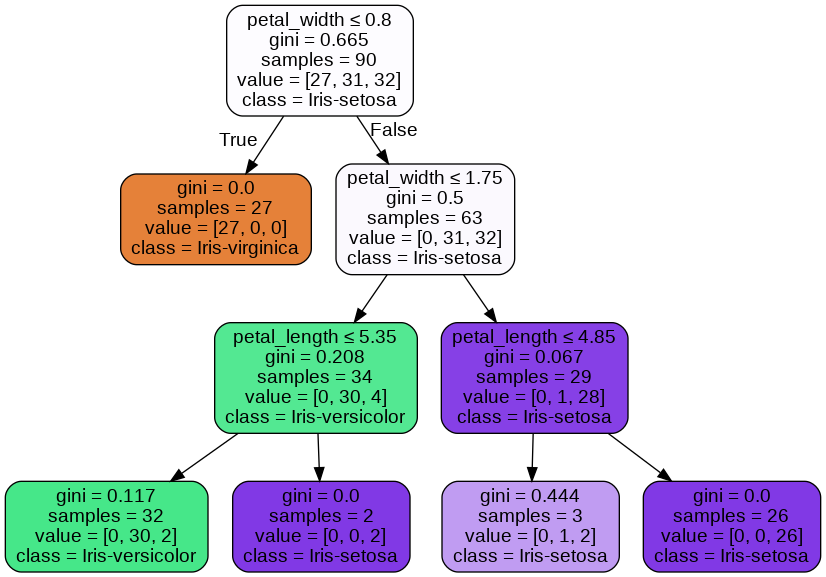

In [ ]:
graph = pydotplus.graphviz.graph_from_dot_file("iris.dot")
Image(graph.create_png())

# 11. DECISION TREE CLASSIFICATION ALGO
## (based on ENTROPY criterion and MAX_DEPTH = 5 ) 


---



In [ ]:
# Applying Decision tree classification on x_train and y_train with MAX_DEPTH = 5
# ENTROPY Classifier = clf_entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicted y-values when ENTROPY is used
y_pred_entropy = clf_entropy.predict(x_test)
y_pred_entropy

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',


In [ ]:
print('With ENTROPY as Criterion\nDecision Tree Classifier Model Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

With ENTROPY as Criterion
Decision Tree Classifier Model Accuracy: 0.9667


In [ ]:
print('Training set score: {:.4f}'.format(clf_entropy.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_entropy.score(x_test, y_test)))

Training set score: 0.9889
Test set score: 0.9667


In [ ]:
# CLEARLY Training Score is greater than Test Score.... IT's UNDER-FITTING !!!

[Text(297.6, 398.64, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 90\nvalue = [27, 31, 32]'),
 Text(223.20000000000002, 326.15999999999997, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(372.0, 326.15999999999997, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 63\nvalue = [0, 31, 32]'),
 Text(223.20000000000002, 253.67999999999998, 'X[2] <= 5.35\nentropy = 0.523\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(148.8, 181.2, 'X[3] <= 1.45\nentropy = 0.337\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(74.4, 108.71999999999997, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(223.20000000000002, 108.71999999999997, 'X[1] <= 2.6\nentropy = 0.764\nsamples = 9\nvalue = [0, 7, 2]'),
 Text(148.8, 36.23999999999995, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(297.6, 36.23999999999995, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(297.6, 181.2, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(520.8000000000001, 253.67999999999998, 'X[2] <= 4.85\nentropy = 0.216\nsa

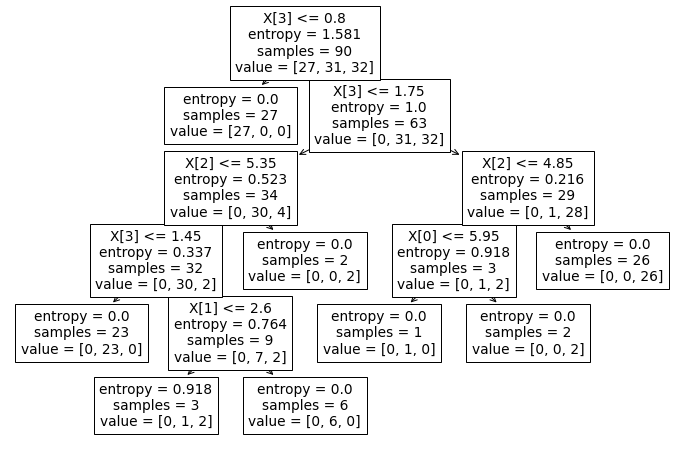

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(x_train, y_train)) 

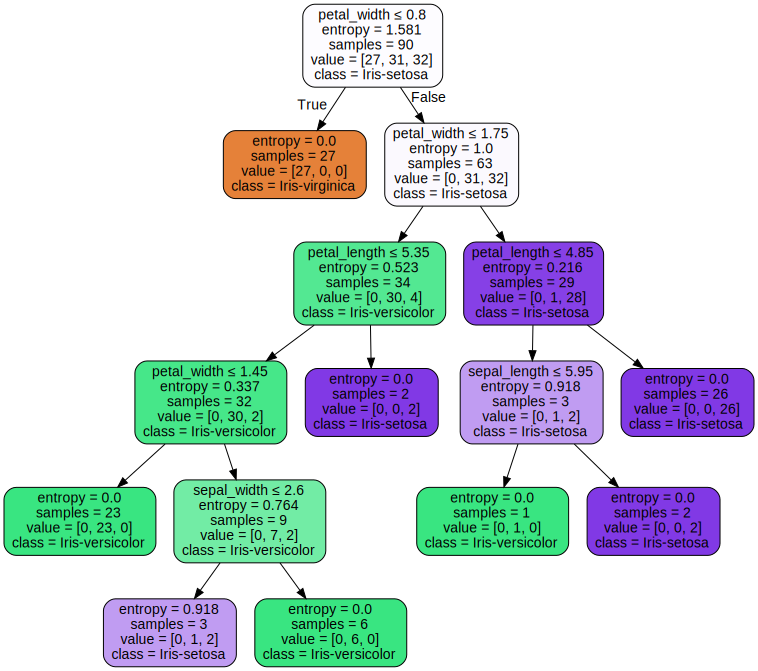

In [ ]:
dot_data = tree.export_graphviz(clf_entropy.fit(x_train, y_train), 
                                out_file=None, 
                                feature_names=list(x.columns),  
                                class_names=[ 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa' ],  
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                                leaves_parallel=False
                                )  
graph = graphviz.Source(dot_data)  
graph 